# Audio Steganograpghy
----------

In [130]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft, ifft, fftfreq, fftshift
import numpy as np
import IPython.display as ipd

## Preparing
---

### Reading the audio files

In [134]:
rate1, data1 = wav.read("audio1.wav")

total_samples1 = len(data1)
sample_spacing1 = 1/rate1
duration1 = total_samples1*sample_spacing1 # seconds

ipd.Audio(data1, rate=rate1) # Audio player

In [83]:
rate2, data2 = wav.read("audio2.wav")

total_samples2 = len(data2)
sample_spacing2 = 1/rate2
duration2 = total_samples2*sample_spacing2 # seconds

ipd.Audio(data2, rate=rate2) # Audio player

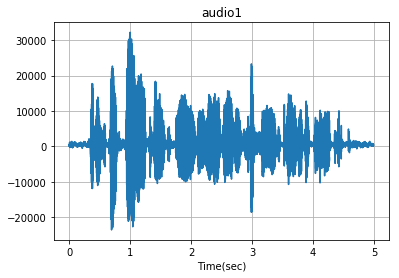

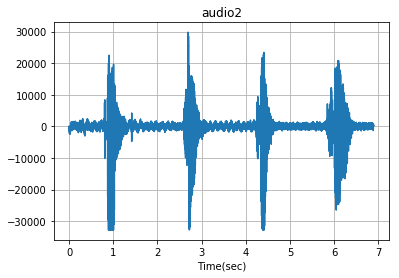

In [106]:
plt.title("audio1")
x1 = np.linspace(0, duration1, total_samples1)
plt.plot(x1, data1)
plt.xlabel('Time(sec)')
plt.grid()
plt.show()

plt.title("audio2")
x2 = np.linspace(0, duration2, total_samples2)
plt.plot(x2, data2)
plt.xlabel('Time(sec)')
plt.grid()
plt.show()

### Fourier transform

In [112]:
ft1 = fft(data1)
y_ft1 = 1/total_samples1 * np.abs(fftshift(ft1))
x_ft1 = fftfreq(total_samples1, sample_spacing1)
x_ft1 = fftshift(x_ft1)

ft2 = fft(data2)
y_ft2 = 1/total_samples2 * np.abs(fftshift(ft2))
x_ft2 = fftfreq(total_samples2, sample_spacing2)
x_ft2 = fftshift(x_ft2)

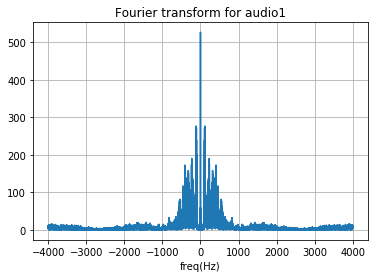

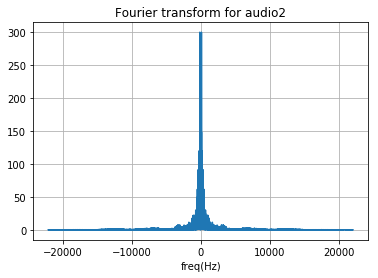

In [120]:
plt.title("Fourier transform for audio1")
plt.plot(x_ft1, y_ft1)
plt.xlabel('freq(Hz)')
plt.grid()
plt.show()

plt.title("Fourier transform for audio2")
plt.plot(x_ft2, y_ft2)
plt.xlabel('freq(Hz)')
plt.grid()
plt.show()

---

## Hiding "audio2" in "audio1"
---

In [125]:
x_ft1[len(x_ft1)-1]

3999.799609238014

In [137]:
ft2_shifted = np.append(np.zeros((4000)), ft2)
ft2_shifted = np.append(ft2_shifted, np.zeros((4000)))

3 Eqs:

total_samples = len(data) = len(fourier_transform) ----> (1)

duration = total_samples * sample_spacing ----------> (2)

rate = 1/sample_spacing -------------------------------> (3)

In [160]:
data2_shifted = ifft(ft2_shifted).real
data2_shifted_rate = 1/(duration2/len(ft2_shifted))

In [193]:
ipd.Audio(data2_shifted, rate=data2_shifted_rate) # Audio player

In [194]:
wav.write('audio2_shifted.wav', int(data2_shifted_rate), (data2_shifted*0.001).astype(np.int16))

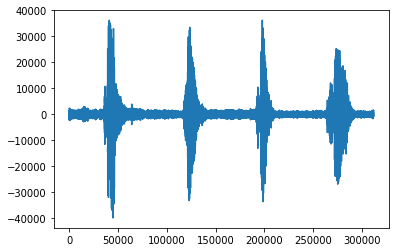

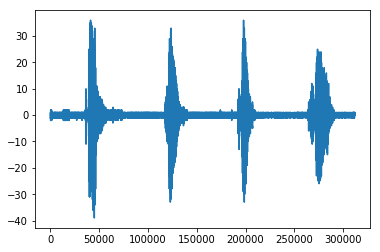

In [190]:
plt.plot(data2_shifted)
plt.show()

plt.plot((data2_shifted*0.001).astype(np.int16))
plt.show()